<h2 align="center">Language Processing Pipeline in Spacy</h2>

<h3>Blank nlp pipeline</h3>

In [1]:
import spacy

Creating Blank pipeline & tokenizer will be there by default



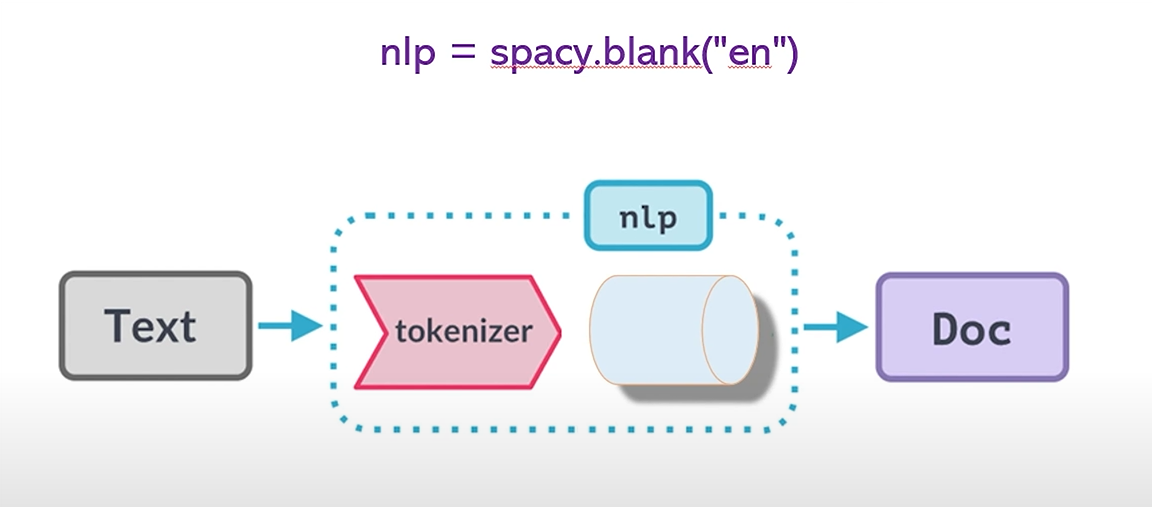

In [2]:
nlp_spacy = spacy.blank('en')

doc = nlp_spacy("Dr. Starnge loves pav bhaji of mumbai as it costs oly 2$ per plate.")

for token in doc:
    print(token)

Dr.
Starnge
loves
pav
bhaji
of
mumbai
as
it
costs
oly
2
$
per
plate
.


In [3]:
nlp_spacy.pipe_names

[]

nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer

More general diagram for nlp pipeline may look something like below


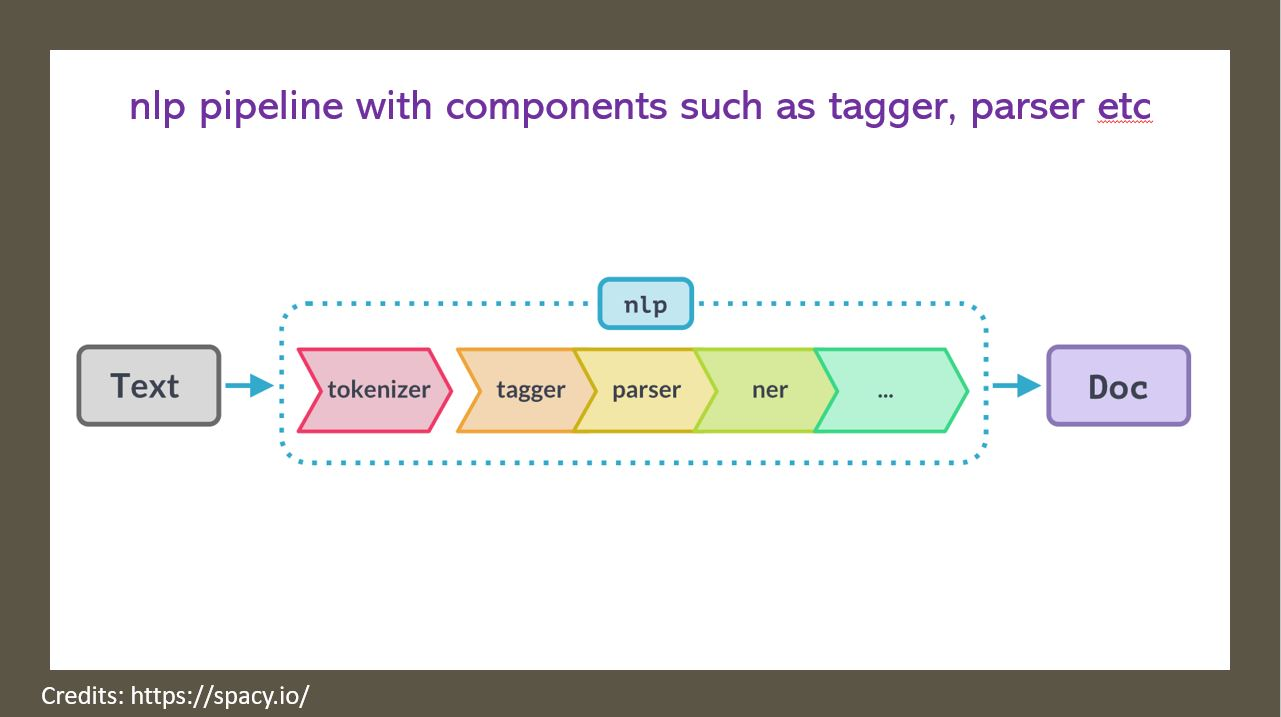



<h3>Download trained pipeline</h3>

To download trained pipeline use a command such as,

python -m spacy download en_core_web_sm

This downloads the small (sm) pipeline for english language

Further instructions on : https://spacy.io/usage/models#quickstart

In [4]:
nlp_spacy = spacy.load("en_core_web_sm")

In [5]:
nlp_spacy.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
nlp_spacy.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1f4df053c50>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1f4e05eeab0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1f4e8a3aa40>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1f4e8239d50>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1f4e8234b10>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1f4e8a3ab20>)]

sm in en_core_web_sm means small. There are other models available as well such as medium, large etc. Check this: 

https://spacy.io/usage/models#quickstart

In [12]:
doc = nlp_spacy("Dr. Starnge loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
    print(token, " | ", token.pos_, " | ", token.lemma_)

Dr.  |  PROPN  |  Dr.
Starnge  |  PROPN  |  Starnge
loves  |  VERB  |  love
pav  |  NOUN  |  pav
bhaji  |  NOUN  |  bhaji
of  |  ADP  |  of
mumbai  |  NOUN  |  mumbai
as  |  SCONJ  |  as
it  |  PRON  |  it
costs  |  VERB  |  cost
only  |  ADV  |  only
2  |  NUM  |  2
$  |  NUM  |  $
per  |  ADP  |  per
plate  |  NOUN  |  plate
.  |  PUNCT  |  .


<h3>Named Entity Recognition</h3>

In [14]:
doc = nlp_spacy("Dr. Starnge loves pav bhaji of mumbai as it costs only 2$ per plate.")

for ent in doc.ents:
    print(ent.text, ent.label_)

Starnge PERSON
mumbai GPE


In [22]:
doc = nlp_spacy("Tata Services going to acquire Zudio for $5 billion")

for ent in doc.ents:
    print(ent.text," | ", ent.label_, " | ", spacy.explain(ent.label_))

Tata Services  |  ORG  |  Companies, agencies, institutions, etc.
Zudio  |  GPE  |  Countries, cities, states
$5 billion  |  MONEY  |  Monetary values, including unit


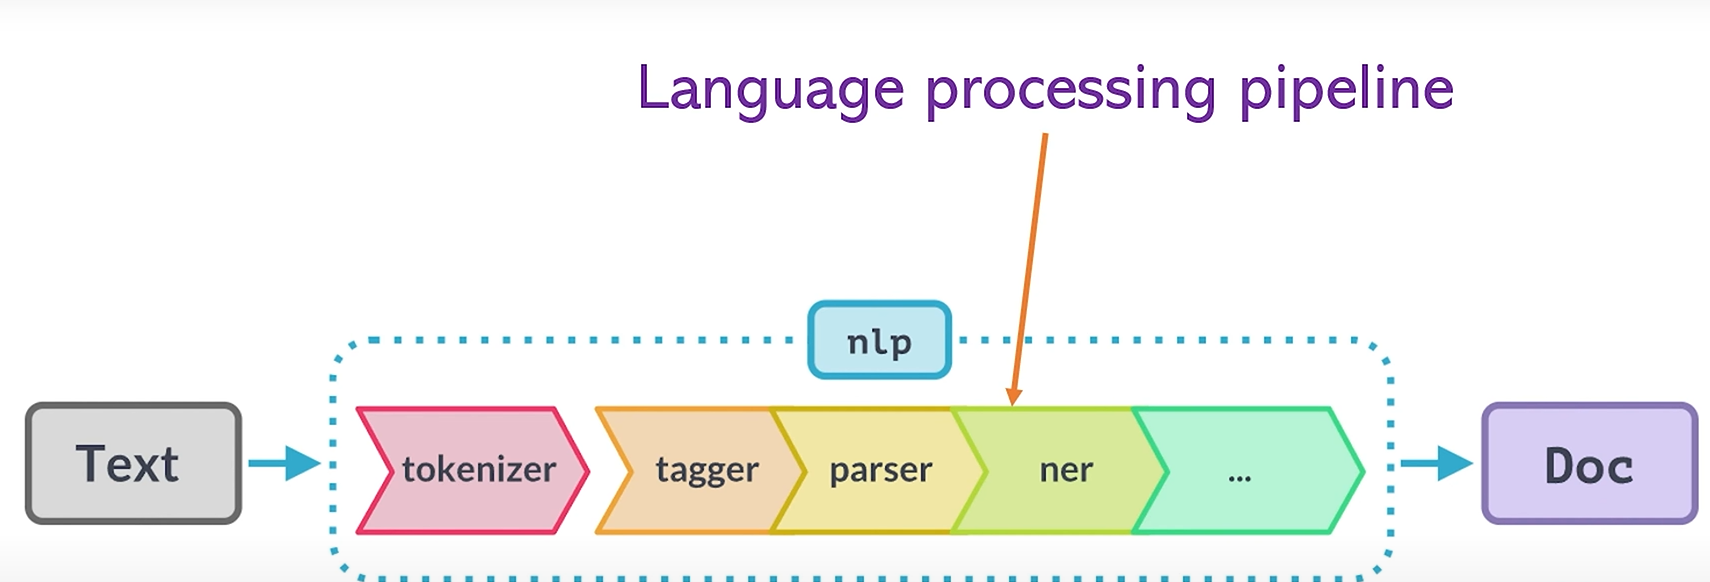

we can use n number of components & we can customise it, alos we can use predefined pipelines


we can also visualize these things

In [23]:
from spacy import displacy

displacy.render(doc, style="ent")

In [27]:
doc = nlp_spacy("Dr. Starnge loves pav bhaji of mumbai as it costs only 2$ per plate.")
displacy.render(doc, style="ent")

<h3>Adding a component to a blank pipeline</h3>


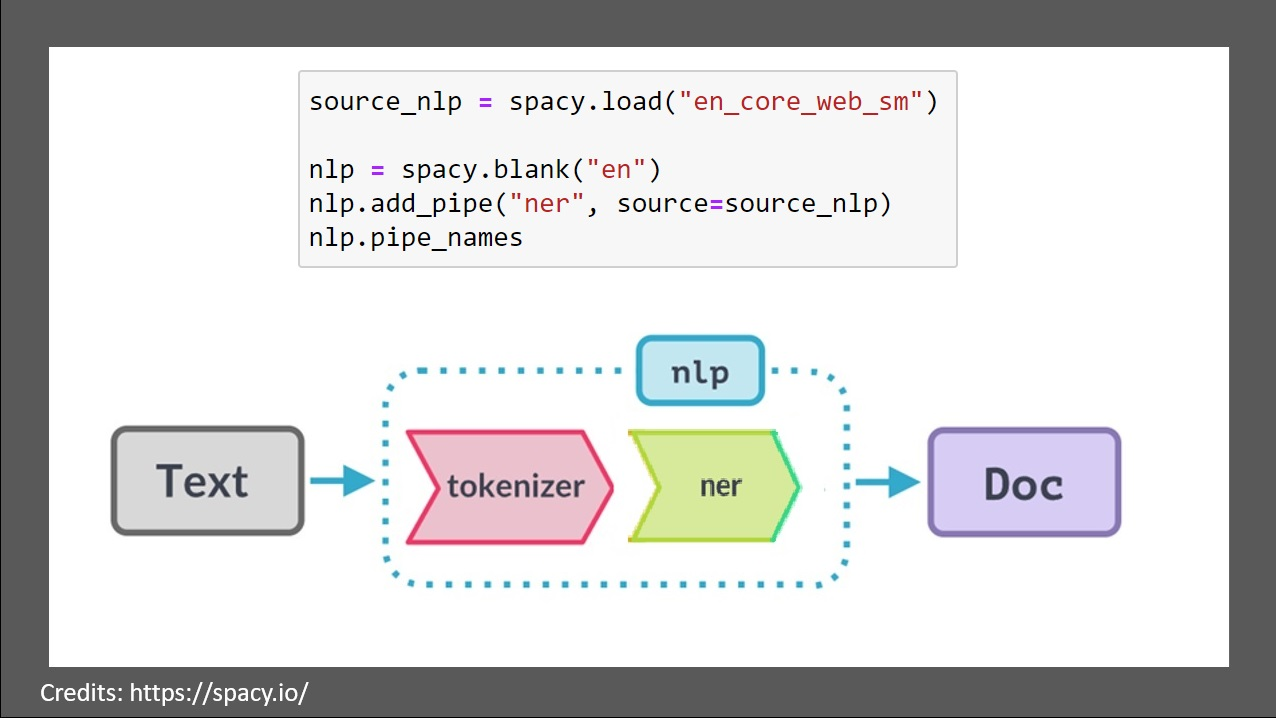

In [28]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")

nlp.add_pipe("ner", source= source_nlp)
nlp.pipe_names

['ner']

In [30]:
doc = nlp("Dr. Starnge loves pav bhaji of mumbai as it costs only $2 per plate.")

for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))


Starnge  |  PERSON  |  People, including fictional
mumbai  |  GPE  |  Countries, cities, states
only $2  |  MONEY  |  Monetary values, including unit
